## Teaching Assistance

### Data Overview and Introduction
- Dataset Description: The Teaching Assistant (TA) Performance Evaluation dataset contains data from 151 TA assignments at the University of Wisconsin-Madison, including attributes like native language, instructor, course, semester type, and class size. The target variable categorizes TA performance into three levels: low, medium, and high, based on these factors.
- Problem Statement: The goal is to predict the performance level of a teaching assistant based on various attributes such as whether the TA is a native English speaker, the instructor they worked with, the course they assisted in, the semester type, and the class size. The target variable is the class attribute, which classifies the TA's performance into three categories: low, medium, or high.

### 1. Import Libraries and Load the Dataset
In this step, you need to import all the libraries required for the analysis and load the dataset into the notebook.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

### 2. Data Preparation
Data Collection and Loading: Load the dataset into a suitable environment (e.g. Pandas DataFrame).

In [3]:
# loading dataset
data=pd.read_csv('tech_assistance.csv')

In [5]:
# showing 1st five rows
data.head()

,Native_teacher,Instructor,Course,Semester,Class size,Class attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


### 3. Basic checks and EDA

In [7]:
# showing 1st five rows
data.head()

,Native_teacher,Instructor,Course,Semester,Class size,Class attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [9]:
# showing last five rows
data.tail()

,Native_teacher,Instructor,Course,Semester,Class size,Class attribute
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1
150,2,2,10,2,27,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Native_teacher   151 non-null    int64
 1   Instructor       151 non-null    int64
 2   Course           151 non-null    int64
 3   Semester         151 non-null    int64
 4   Class size       151 non-null    int64
 5   Class attribute  151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [13]:
data.describe()

,Native_teacher,Instructor,Course,Semester,Class size,Class attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


### Preparing a Complete Data Analysis Report
a. Data Preprocessing:- Check for missing values and perform necessary preprocessing steps like handling missing data or encoding categorical variables.

In [15]:
data.isnull().sum()

Native_teacher     0
Instructor         0
Course             0
Semester           0
Class size         0
Class attribute    0
dtype: int64

In [17]:
data.head()

,Native_teacher,Instructor,Course,Semester,Class size,Class attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [19]:
data.describe()

,Native_teacher,Instructor,Course,Semester,Class size,Class attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [21]:
data.columns

Index(['Native_teacher', 'Instructor', 'Course', 'Semester', 'Class size',
       'Class attribute'],
      dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Native_teacher   151 non-null    int64
 1   Instructor       151 non-null    int64
 2   Course           151 non-null    int64
 3   Semester         151 non-null    int64
 4   Class size       151 non-null    int64
 5   Class attribute  151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [25]:
data['Class size'].describe()

count    151.000000
mean      27.867550
std       12.893758
min        3.000000
25%       19.000000
50%       27.000000
75%       37.000000
max       66.000000
Name: Class size, dtype: float64

### Exploratory Data Analysis (EDA)
- Perform EDA to understand the distribution and relationship of the variables.
- Univariate Analysis: Look at the distribution of individual variables (e.g. histograms for continuous variables, bar plots for categorical variables and box plots).

<Figure size 9000x10000 with 0 Axes>

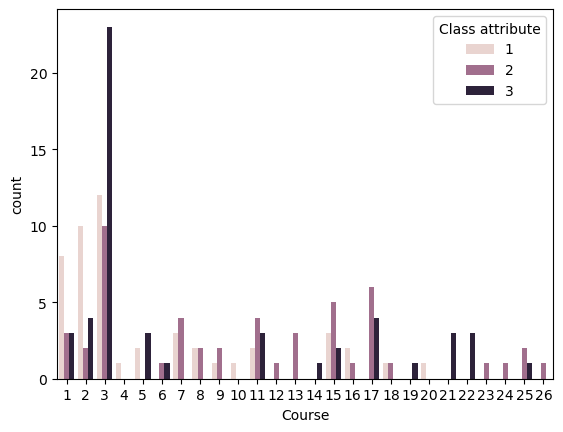

<Figure size 9000x10000 with 0 Axes>

In [27]:
# Univariate analysis
sns.countplot(x=data['Course'],hue=data['Class attribute'])
plt.figure(figsize=(90,100))

<Axes: xlabel='Class attribute', ylabel='Count'>

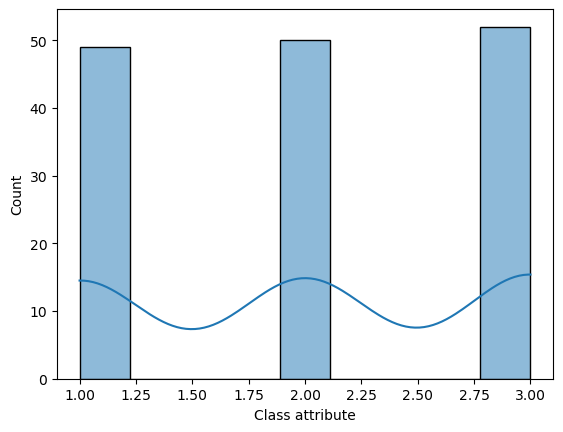

In [29]:
sns.histplot(x=data['Class attribute'],kde=True)

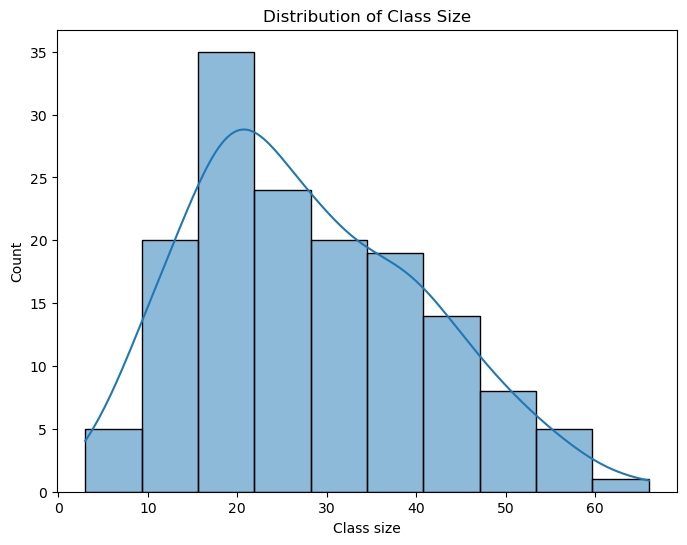

In [31]:
# Visualize the distribution of Class sizes
plt.figure(figsize=(8, 6))
sns.histplot(data['Class size'], kde=True)
plt.title('Distribution of Class Size')
plt.show()

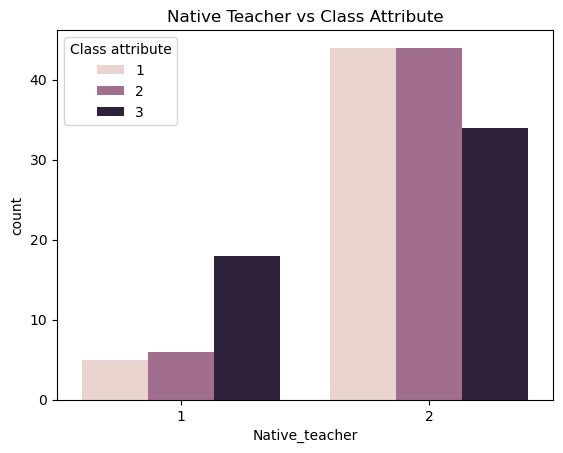

In [33]:
# Visualize the relationship between 'Native_teacher' and 'Class attribute'
sns.countplot(x='Native_teacher', hue='Class attribute', data=data)
plt.title('Native Teacher vs Class Attribute')
plt.show()

#### Feature Selection

<Axes: >

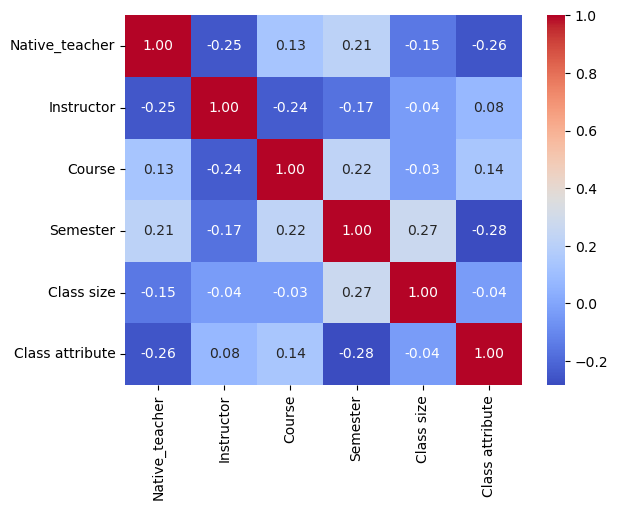

In [35]:
# Visualize correlation matrix for numerical features
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

#### Creating subplot

In [37]:
for i in data.columns:
    print(i)

Native_teacher
Instructor
Course
Semester
Class size
Class attribute


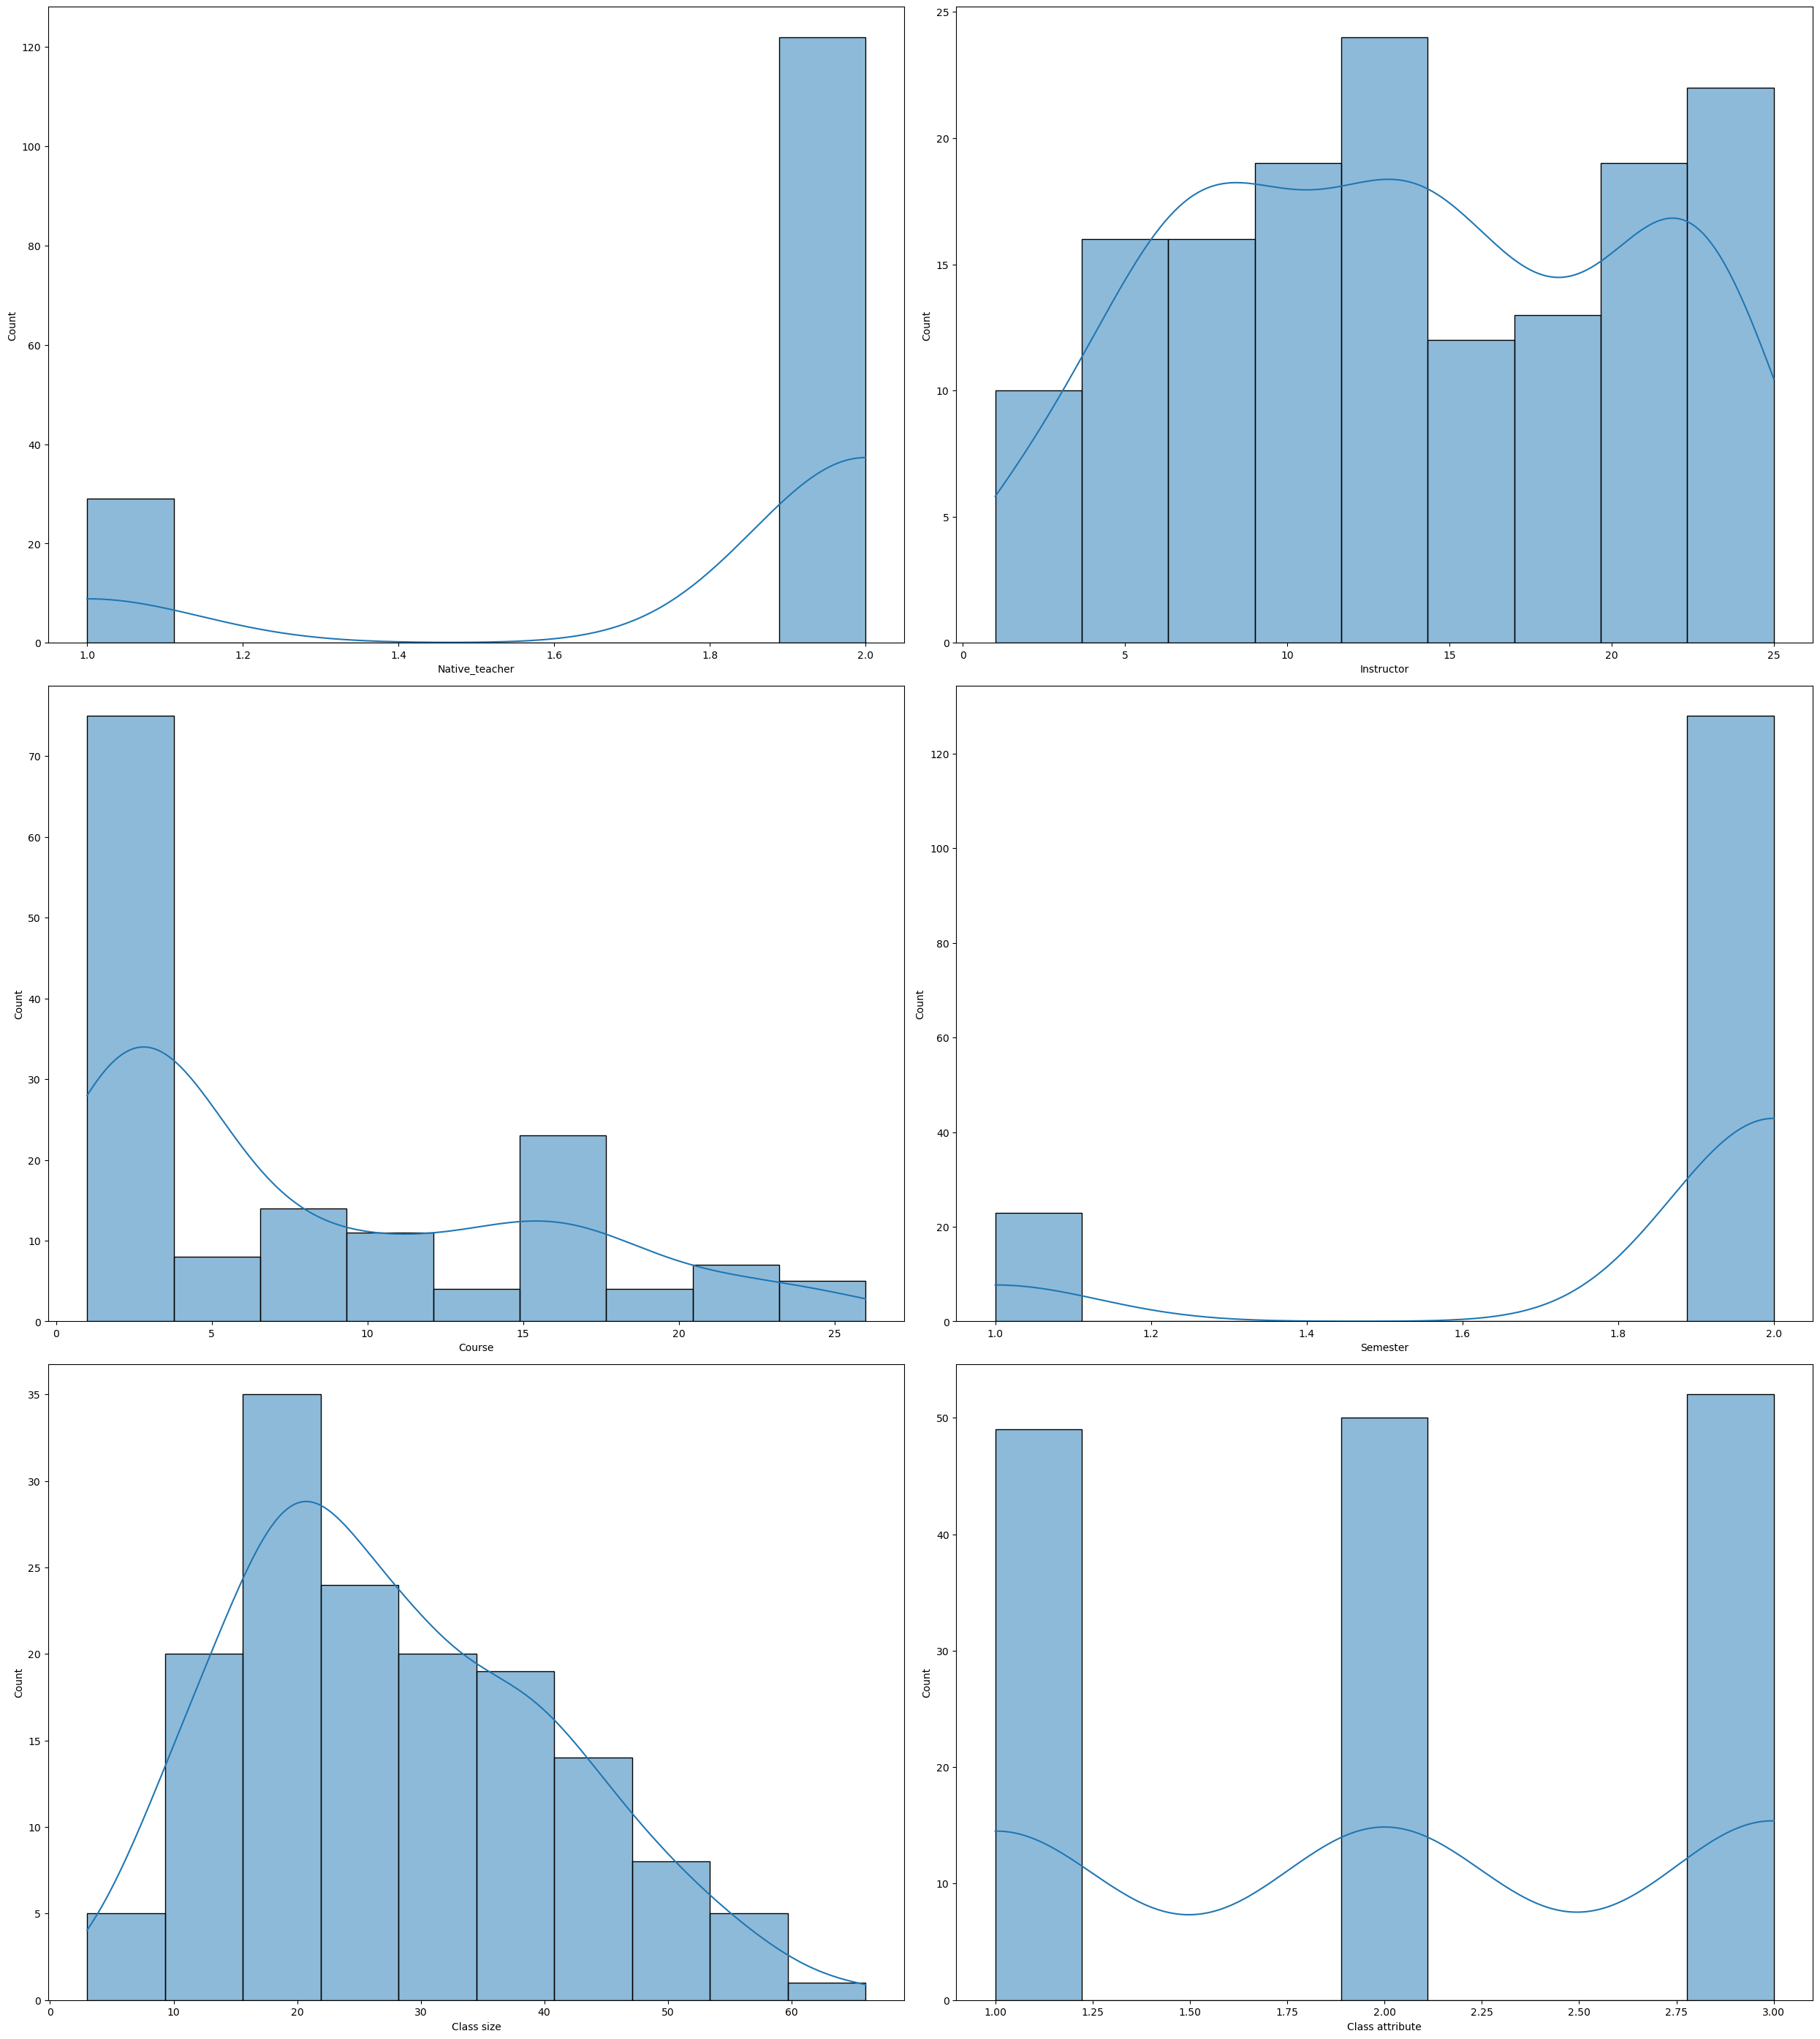

In [39]:
plt.figure(figsize=(25,28),facecolor='white')
plotnum=1
for i in data.columns:
    plt.subplot(3,2,plotnum)
    sns.histplot(x=data[i],kde=True)
    plotnum+=1
plt.tight_layout()

import warnings
warnings.filterwarnings('ignore') 

<Axes: xlabel='Semester', ylabel='Course'>

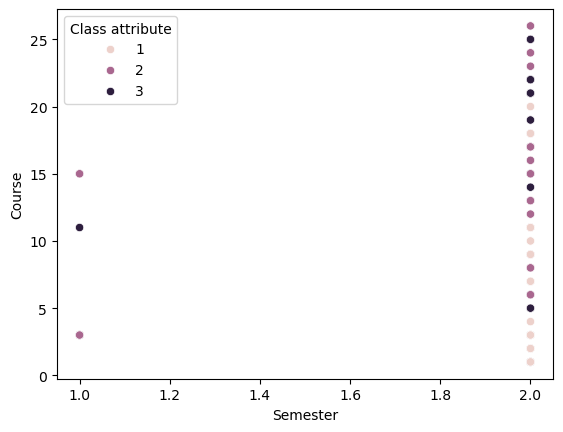

In [41]:
# Relation between Semester and Course
sns.scatterplot(x='Semester',y='Course',data=data,hue='Class attribute')

<Figure size 2500x2500 with 0 Axes>

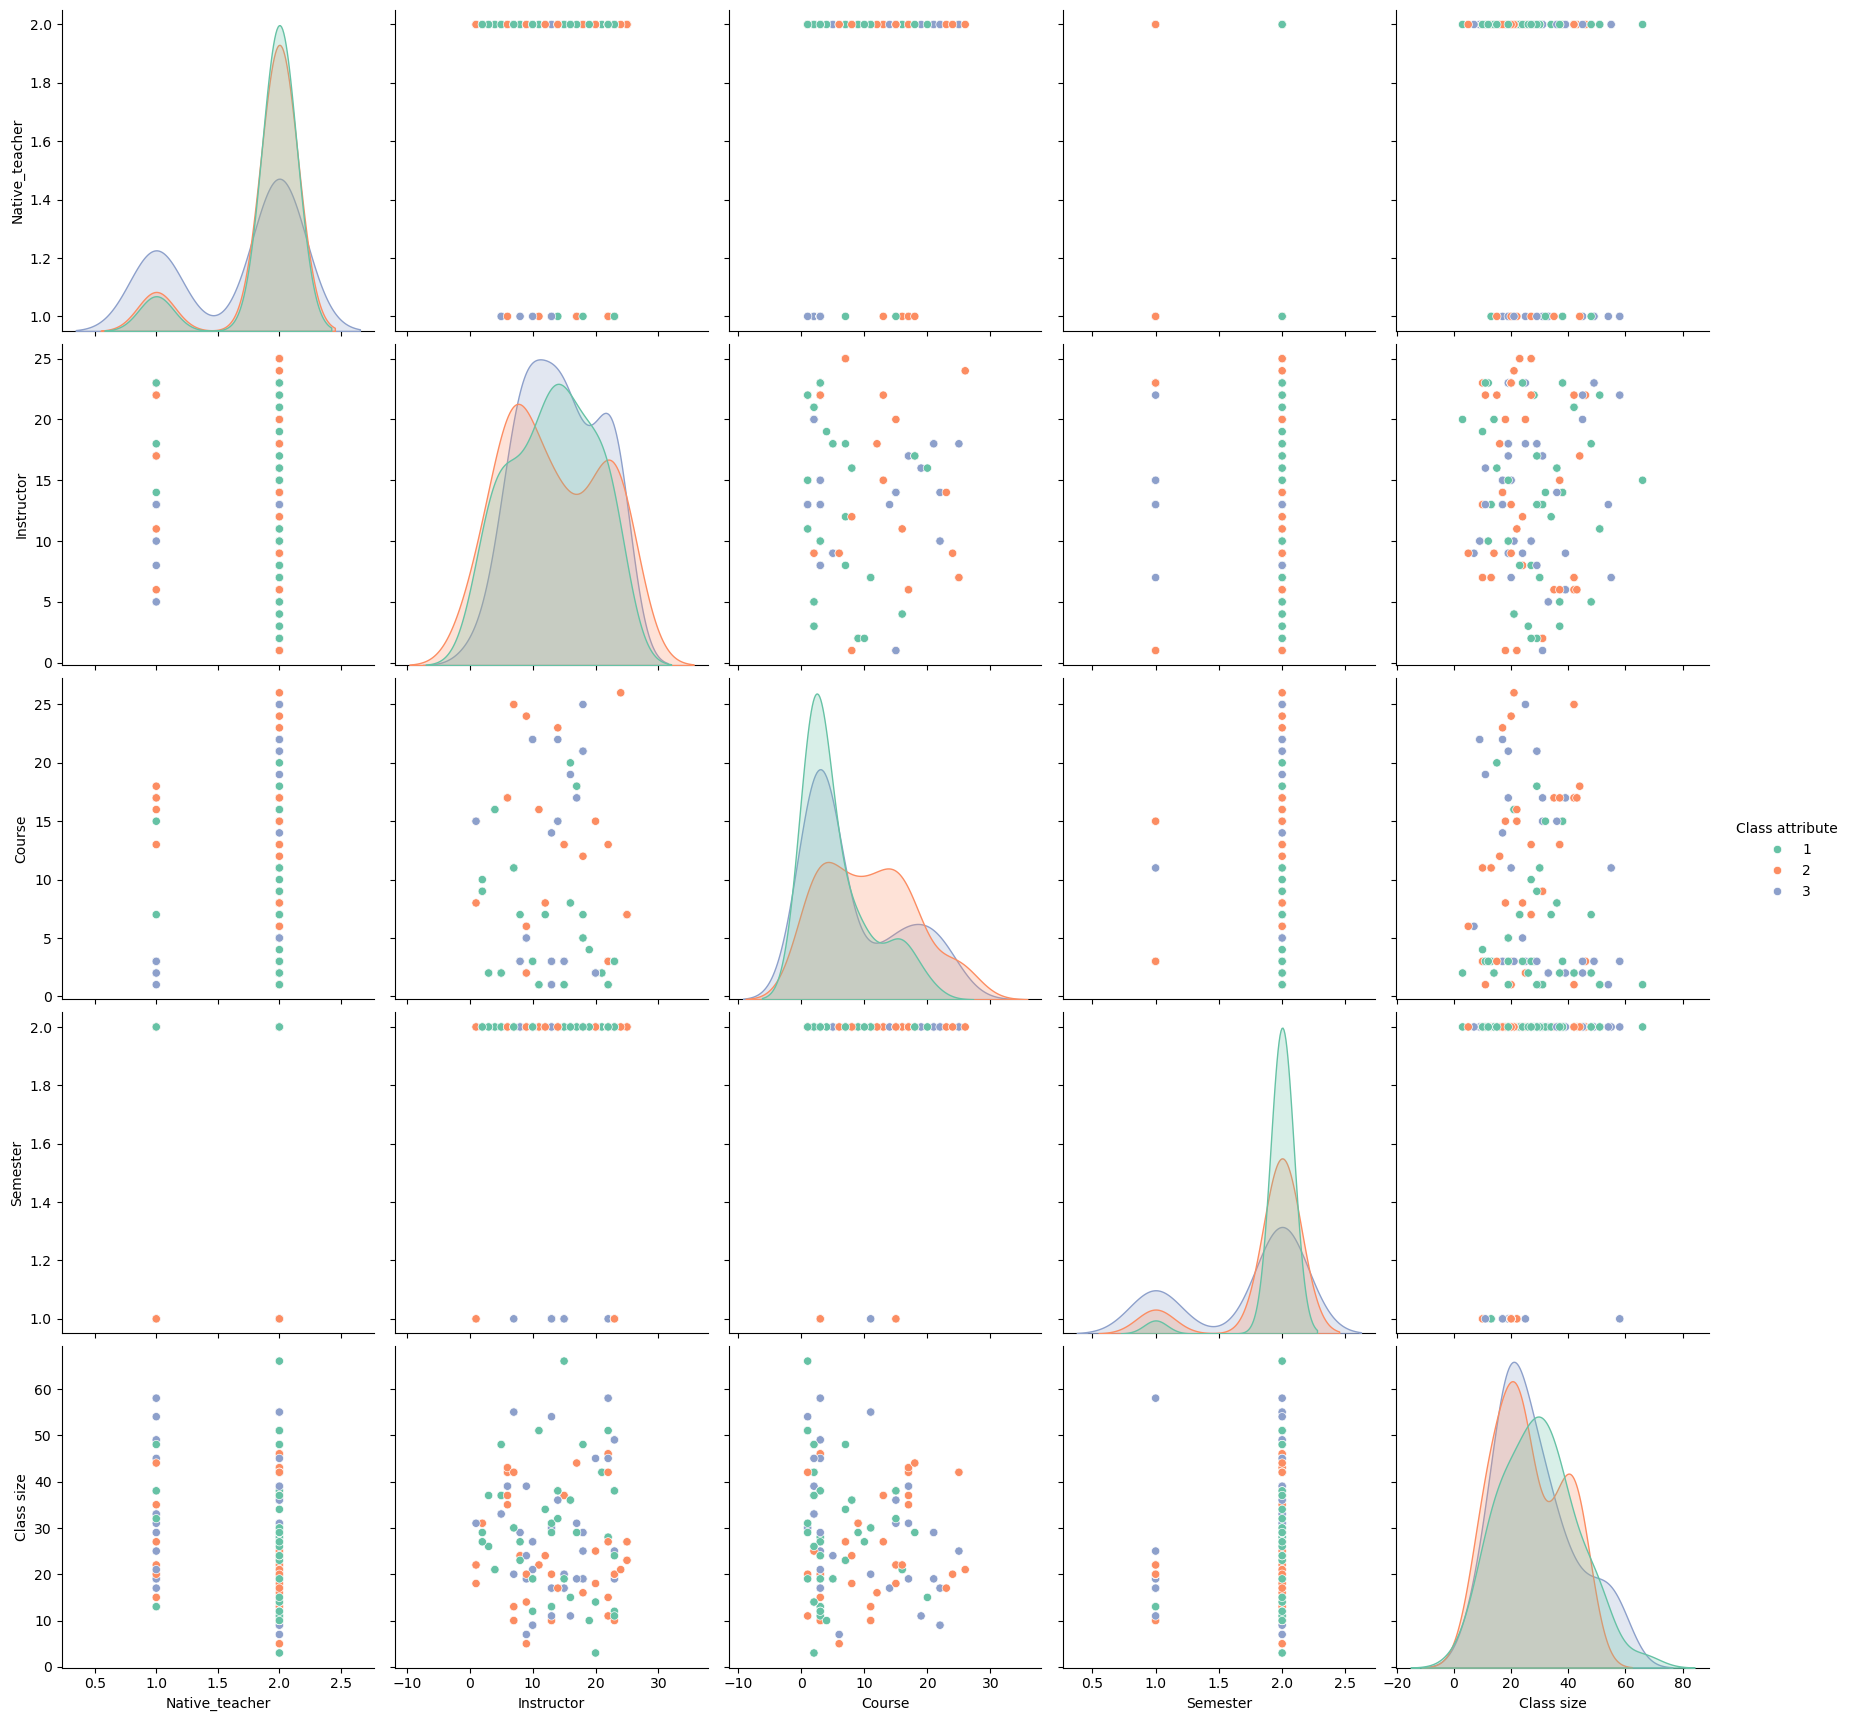

<Figure size 2500x2500 with 0 Axes>

In [43]:
# Multivariate 
sns.pairplot(data,hue='Class attribute',height=3.5, palette='Set2')
plt.figure(figsize=(25, 25))

- Target Distribution: Analyze the distribution of the target variable (liver disease presence or absence). This helps understand class imbalance if it exists.

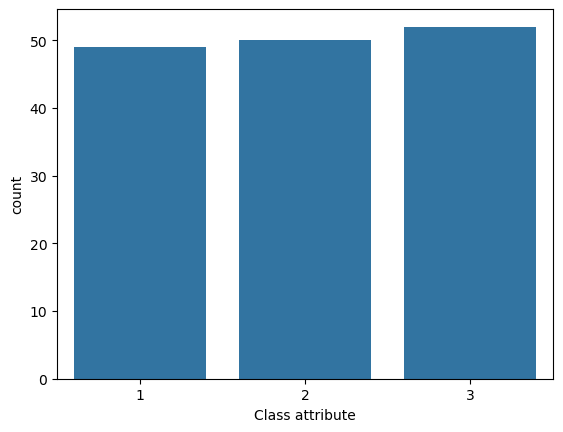

In [45]:
# Plotting the distribution of target variable
sns.countplot(x='Class attribute', data=data)
plt.show()

### 4. Data Preprocessing

In [47]:
data.isnull().sum()

Native_teacher     0
Instructor         0
Course             0
Semester           0
Class size         0
Class attribute    0
dtype: int64

In [49]:
data.describe()

,Native_teacher,Instructor,Course,Semester,Class size,Class attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


#### Handling Outliers

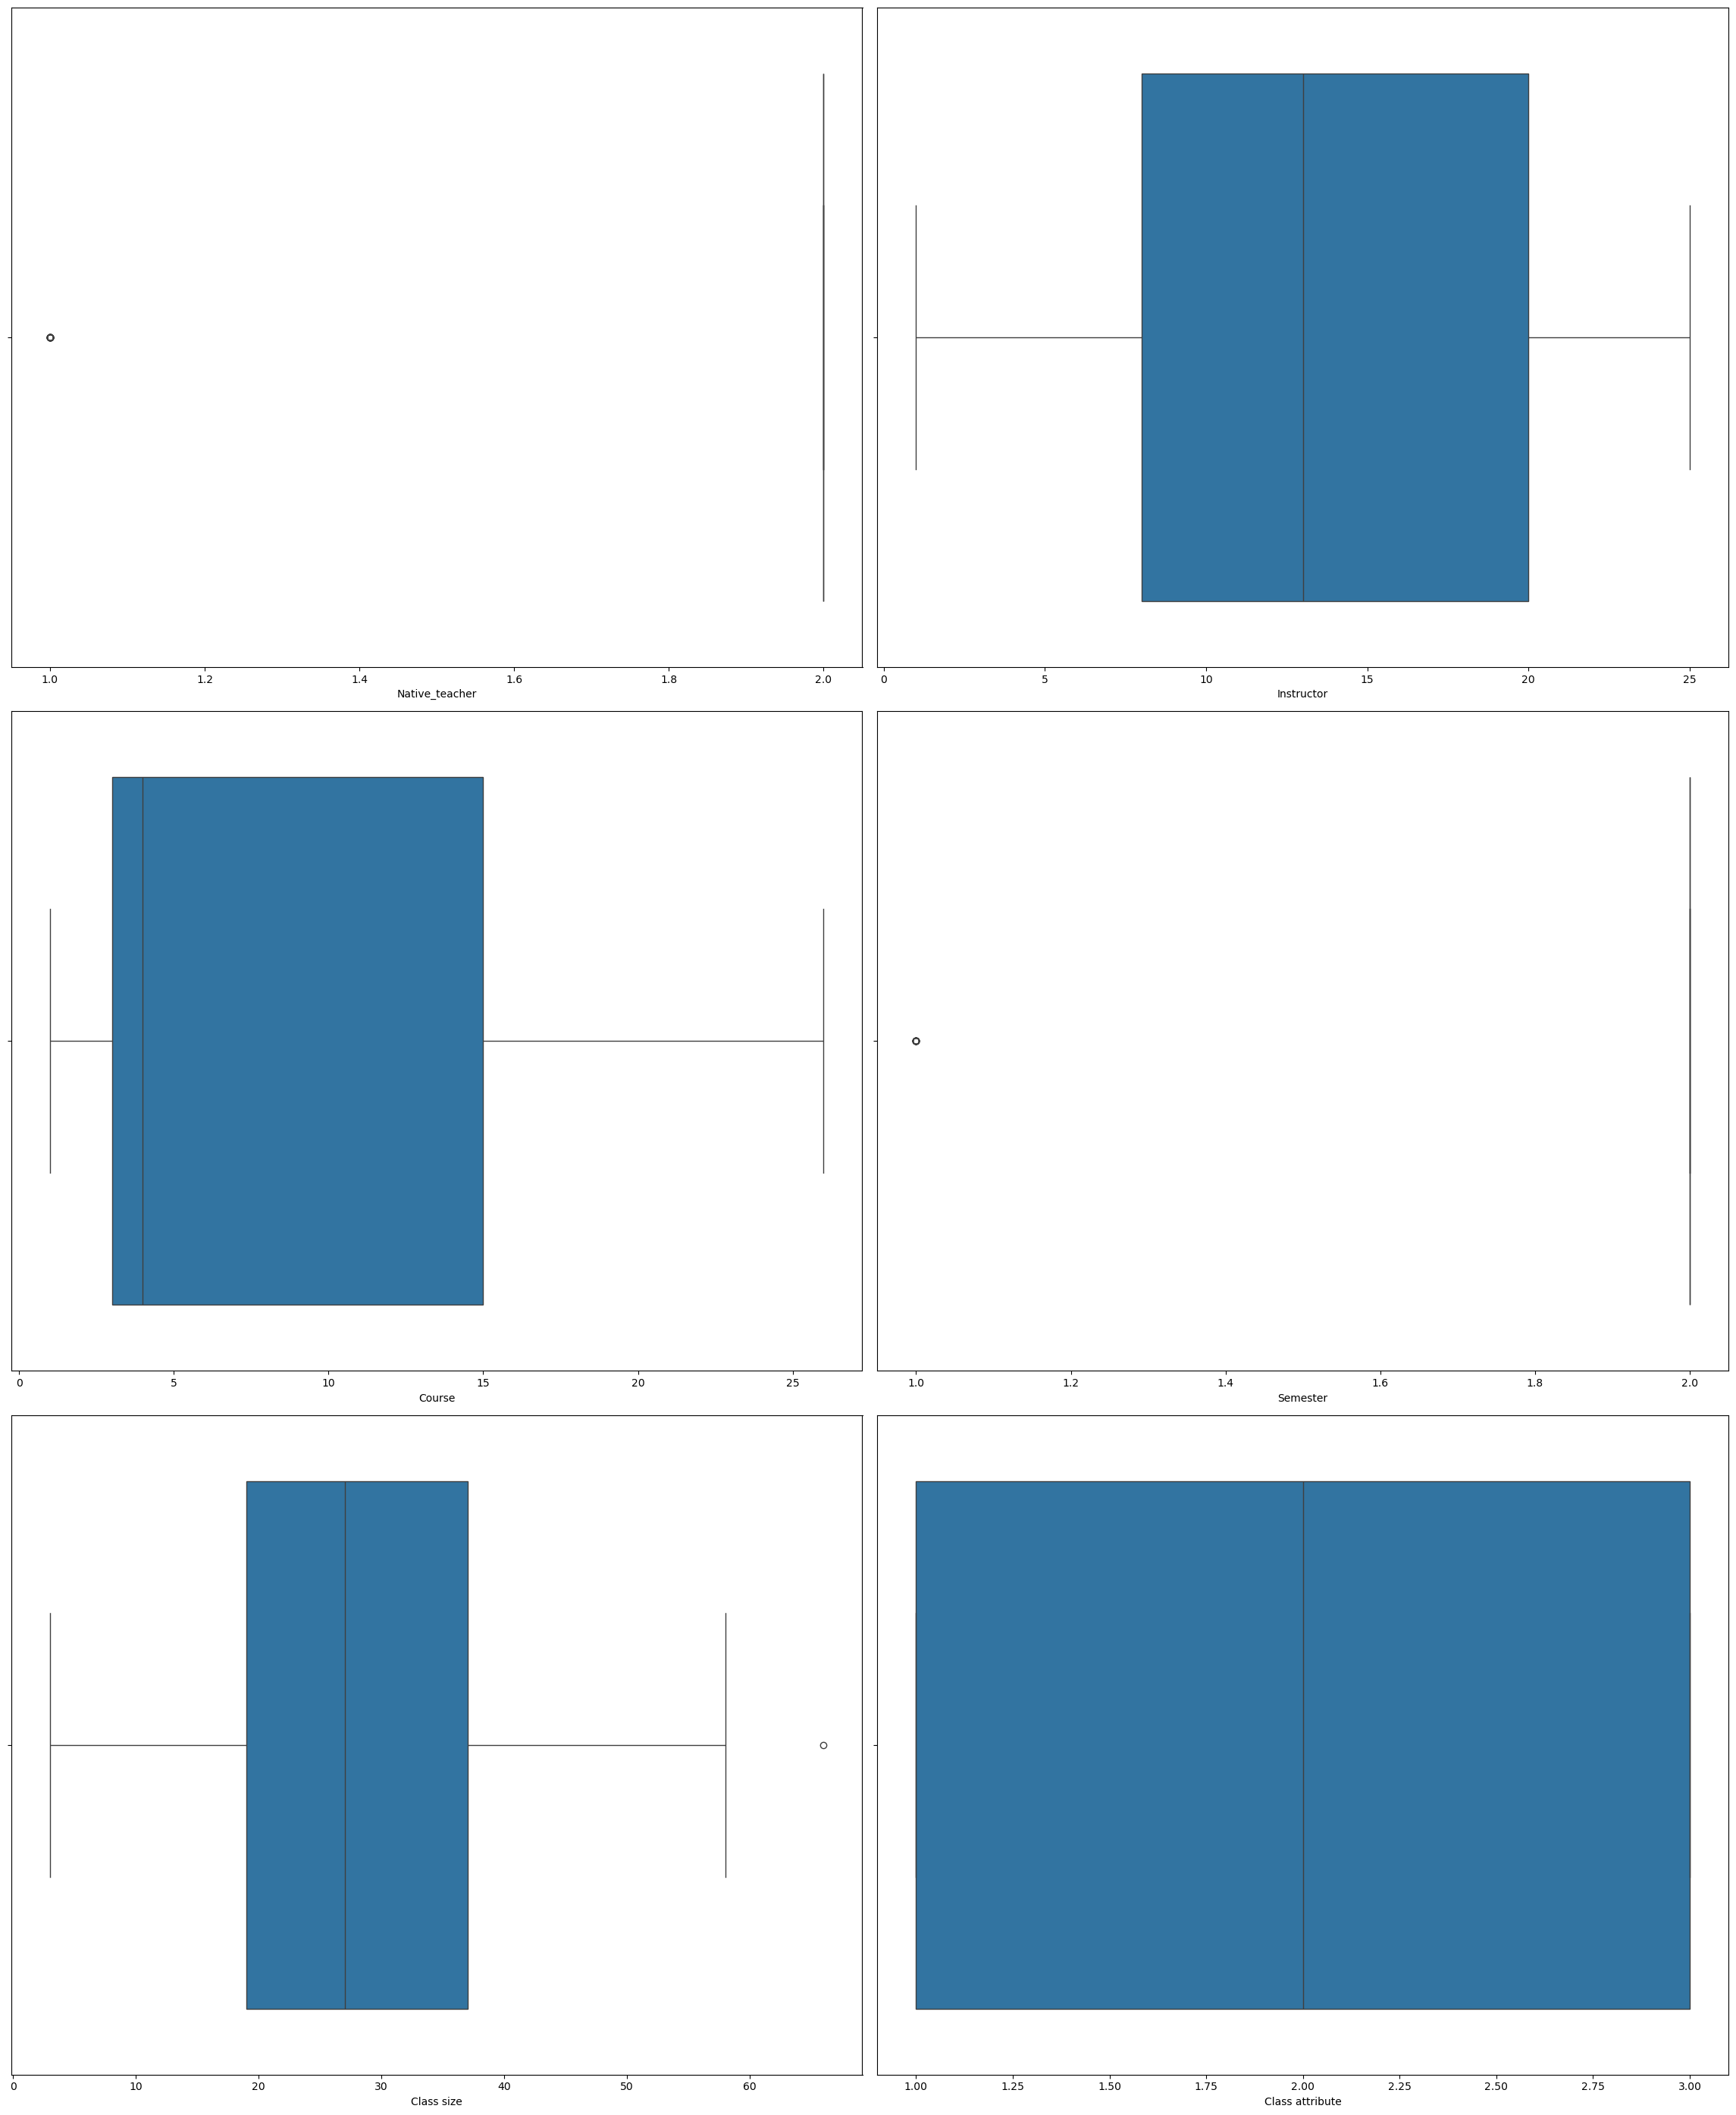

In [51]:
plt.figure(figsize=(23,28),facecolor='white')
plotnum=1
for i in data.columns:
    plt.subplot(3,2,plotnum)
    sns.boxplot(x=data[i])
    plotnum+=1
plt.tight_layout()

In [53]:
# Group by Native_teacher and evaluate Class attribute
data.groupby('Native_teacher')['Class attribute'].value_counts()

Native_teacher  Class attribute
1               3                  18
                2                   6
                1                   5
2               1                  44
                2                  44
                3                  34
Name: count, dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder

# Label encode the target variable (Class attribute)
le = LabelEncoder()
data['Class attribute'] = le.fit_transform(data['Class attribute'])

# One-hot encode categorical columns like Instructor and Course
data = pd.get_dummies(data, columns=['Instructor', 'Course'], drop_first=True)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Class size'] = scaler.fit_transform(data[['Class size']])

In [59]:
from sklearn.model_selection import train_test_split

X = data.drop('Class attribute', axis=1)  # Features
y = data['Class attribute']  # Target variable

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Creation
- Model Selection: Choose appropriate machine learning models which include Logistic Regression, Decision Trees, Random Forest, Support Vector Machine (SVM), and XGBoost.

In [63]:
logreg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=10000, class_weight='balanced')

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Then train the model on scaled data
logreg.fit(X_scaled, y)

LogisticRegression(class_weight='balanced', max_iter=10000, multi_class='ovr')

### Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
logreg = LogisticRegression(max_iter=10000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.62      0.45      0.53        11
           2       0.78      0.78      0.78         9

    accuracy                           0.68        31
   macro avg       0.68      0.68      0.67        31
weighted avg       0.68      0.68      0.67        31



### Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.69      0.82      0.75        11
           2       1.00      0.44      0.62         9

    accuracy                           0.74        31
   macro avg       0.80      0.72      0.72        31
weighted avg       0.79      0.74      0.73        31



### Gradient Boosting Classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize model
gb = GradientBoostingClassifier()

# Train the model
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Gradient Boosting Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.69      0.82      0.75        11
           2       0.83      0.56      0.67         9

    accuracy                           0.74        31
   macro avg       0.76      0.73      0.73        31
weighted avg       0.75      0.74      0.74        31



### Support Vector Machine (SVM)

In [73]:
from sklearn.svm import SVC

# Initialize model
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Report:")
print(classification_report(y_test, y_pred_svm))

SVM Report:
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        11
           1       0.44      0.36      0.40        11
           2       0.67      0.67      0.67         9

    accuracy                           0.52        31
   macro avg       0.52      0.53      0.52        31
weighted avg       0.52      0.52      0.51        31



### Hyperparameter Tuning
- To improve the performance of these models, you can perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV.

In [75]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],      # Max depth of the tree
    'min_samples_split': [2, 5],      # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2]        # Minimum samples required to be at a leaf node
}

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Score: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.69      0.82      0.75        11
           2       1.00      0.44      0.62         9

    accuracy                           0.74        31
   macro avg       0.80      0.72      0.72        31
weighted avg       0.79      0.74      0.73        31



In [77]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean Cross-validation score: {scores.mean()} ± {scores.std()}")

Cross-validation scores: [1.         0.96666667 0.7        0.36666667 0.56666667]
Mean Cross-validation score: 0.7200000000000001 ± 0.24000000000000002


### Confusion Matrix

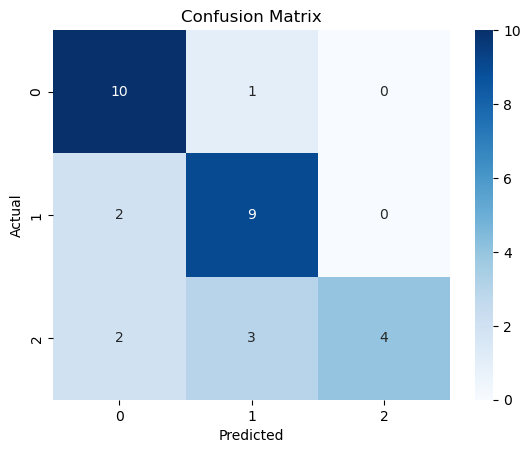

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict using the best model
y_pred = best_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

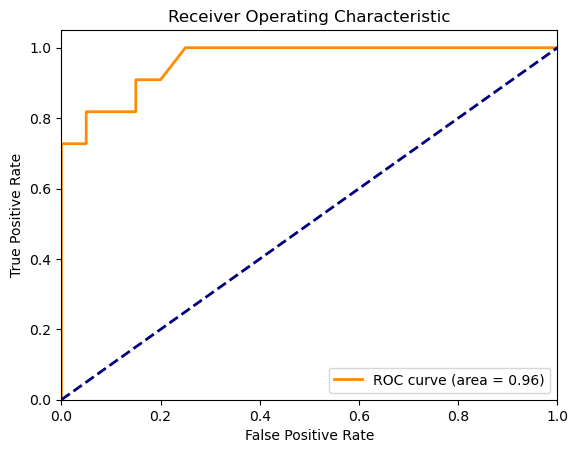

In [81]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multi-class ROC curve
y_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_bin[:, 0], best_model.predict_proba(X_test)[:, 0])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Deployment

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pickle

# Load your dataset
data = pd.read_csv('tech_assistance.csv')

# Label encode the target variable (Class attribute)
le = LabelEncoder()
data['Class attribute'] = le.fit_transform(data['Class attribute'])

# Separate features (X) and target variable (y)
X = data.drop('Class attribute', axis=1)  # Features
y = data['Class attribute']  # Target variable

# Define the column transformer to apply one-hot encoding to 'Instructor' and 'Course'
preprocessor = ColumnTransformer(
    transformers=[
        ('instructor_course', OneHotEncoder(handle_unknown='ignore'), ['Instructor', 'Course']),
        ('scaler', StandardScaler(), ['Class size'])  # Scaling 'Class size'
    ],
    remainder='passthrough'  # Keep the other columns as they are
)

# Create a pipeline with preprocessing and a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())  # You can replace this with any model
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Save the trained pipeline (model + preprocessing) to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(pipeline, model_file)

# Save the LabelEncoder to a separate file
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(le, le_file)

### Flask Deployment Link
http://127.0.0.1:5000/predict 

### Challenges and Risks
- Categorical Data Transformation: Applied label encoding for the target variable and one-hot encoding for categorical features like Instructor and Course.
- Class Imbalance: Addressed using SMOTE for oversampling and class weight adjustment during model training.
- Multicollinearity: Managed by conducting correlation analysis and removing or combining highly correlated features.

### Conclusion
- The Teaching Assistant Performance Evaluation project successfully predicted TA performance based on various factors such as native language, instructor, course, semester type, and class size. 
- Through comprehensive data cleaning, preprocessing, and exploratory data analysis, we identified key correlations and relationships within the dataset. 
- Various machine learning models, including Logistic Regression, Random Forest, Gradient Boosting, and Support Vector Machine, were tested, with Random Forest demonstrating the highest accuracy and overall performance. 
- Challenges such as handling categorical data, managing class imbalance, and addressing overfitting were effectively overcome using techniques like encoding, SMOTE, and pruning.
- The Random Forest model was recommended as the best-performing model for predicting TA performance.

                                                   ---------------------------------